<a href="https://colab.research.google.com/github/alexgualberto/GST24/blob/main/Meteorologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Escolha do Dataset

Para o dataset, utilizamos o site do [INMET](https://portal.inmet.gov.br) (Instituto Nacional de Meteorologia) para a extração do banco de dados histórico das temperaturas de São Carlos entre o ano de 2014 e 2024 (ultimos 10 anos).

Passo a passo:
Entrar no site do INMET -> Dados Meteorologicos -> Banco de Dados Meteorologicos -> "Prosseguir" -> Escolher os parâmetros desejados (estação automática, dados mensais, São Carlos).


#2 - Pré-Processamento

Para o pré-processamento, foi utilizado o software Rstudio.

Primeiramente, para a leitura do arquivo, utilizamos a seguinte função:



```
install.packages("tidyr")
library(tidyr)
caminho <- "C:/Users/User/Downloads/climasaocarlos.csv" #o arquivo fora renomeado localmente para facilitar
read.csv(caminho)
```



O arquivo é uma tabela de coluna única(Nome..SAO.CARLOS), com dados da estação, os dados de data e temperatura presentes a partir da linha 11.

Tabela:                    
                 Nome..SAO.CARLOS
1               Codigo Estacao: A711
2               Latitude: -21.980353
3              Longitude: -47.883927
4                   Altitude: 859.29
5                 Situacao: Operante
6           Data Inicial: 2014-01-01
7             Data Final: 2024-05-16
8   Periodicidade da Medicao: Mensal
9     Data Medicao;TEMPERATURA MEDIA
10                 MENSAL (AUT)(°C);
11                  2014-01-31;24.5;

Primeiramente, filtrei o dataframe a partir da linha 11, para obter apenas os dados de interesse. Depois disso, criei um novo dataframe, dividindo a data e a temperatura em colunas diferentes.



```
dftemp <- df[11:nrow(df), ]  #coluna filtrada a partir da linha 11, apresentando apenas os dados
dftemp <- dftemp %>%
+     separate(Nome..SAO.CARLOS, into = c("date", "temperature"), sep = ";")

head(dftemp)
        date temperature
1 2014-01-31        24.5
2 2014-02-28        24.6
3 2014-03-31        22.7
4 2014-04-30        21.4
5 2014-05-31        18.9
6 2014-06-30        18.7
```

Com o dataset filtrado, veremos, agora, se existem valores nulos ou não numéricos nas colunas:



```
> # Verificar se há valores nulos em todo o data frame
> any_null <- any(is.na(dftemp))
>
> # Exibir o resultado
> print(any_null)
[1] FALSE
```
Aparentemente, não há valores nulos, mas, vamos verificar se existem valores não numéricos.



```
> valores_numericos <- sapply(dftemp, is.numeric)
>
> valores_nao_numericos_por_coluna <- sapply(dftemp, function(x) sum(!is.na(x) & !is.numeric(x)))
>
> print(valores_nao_numericos_por_coluna)
       date temperature
        125         125
```

O valor dessa matriz de valores não numéricos deu diferente de zero, portanto, existe valores não registrados em certas datas.
Após usar a função view(dftemp), a qual mostra o dataframe como uma tabela, ao clicar na coluna temperatura, para ordenação crescente ou decrescente, verificamos a existência de 6 valores nulos

```
indices_null <- which(dftemp$temperature == "null")
> print(indices_null)
[1]  27  55  56  99 100 125
```








Temos algumas opções, como substituir os valores nulos por 0 ou outro valor. O que farei é o seguinte.
A classificação climática de São Carlos é: tropical de altitude com inverno seco (Köppen: Aw).

Realiza-se o mesmo procedimento de extração de dados em outra cidade próxima com o mesmo tipo climático. (A cidade escolhida foi Franca, pelo tipo, altitude e disponibilidade).



```
> dftemp$temperature[indices_null[1]] <- 22.8  
> dftemp$temperature[indices_null[2]] <- 20.2  
> dftemp$temperature[indices_null[3]] <- 19.8
> dftemp$temperature[indices_null[4]] <- 23.3
> dftemp$temperature[indices_null[5]] <- 22.3
> dftemp <- dftemp[-nrow(dftemp), ]
```
As colunas com indice nulo foram substituidas por temperaturas plausiveis, e a ultima coluna (30-05-2024) foi removida, por não ter a medição completa (na data de escrita, as medições não foram concluidas).

O pré-processamento está concluido.




# 3 - Análise


In [ ]:
import pandas as pd

df = pd.read_csv('/content/dftempsc.csv')
df.sort_values(by='data').head()

,data,temperatura
0,2014-01-31,24.5
1,2014-02-28,24.6
2,2014-03-31,22.7
3,2014-04-30,21.4
4,2014-05-31,18.9


In [ ]:
df.describe()

,temperatura
count,124.000000
mean,21.341935
std,2.187552
min,16.500000
25%,19.300000
50%,22.000000
75%,22.900000
max,24.800000


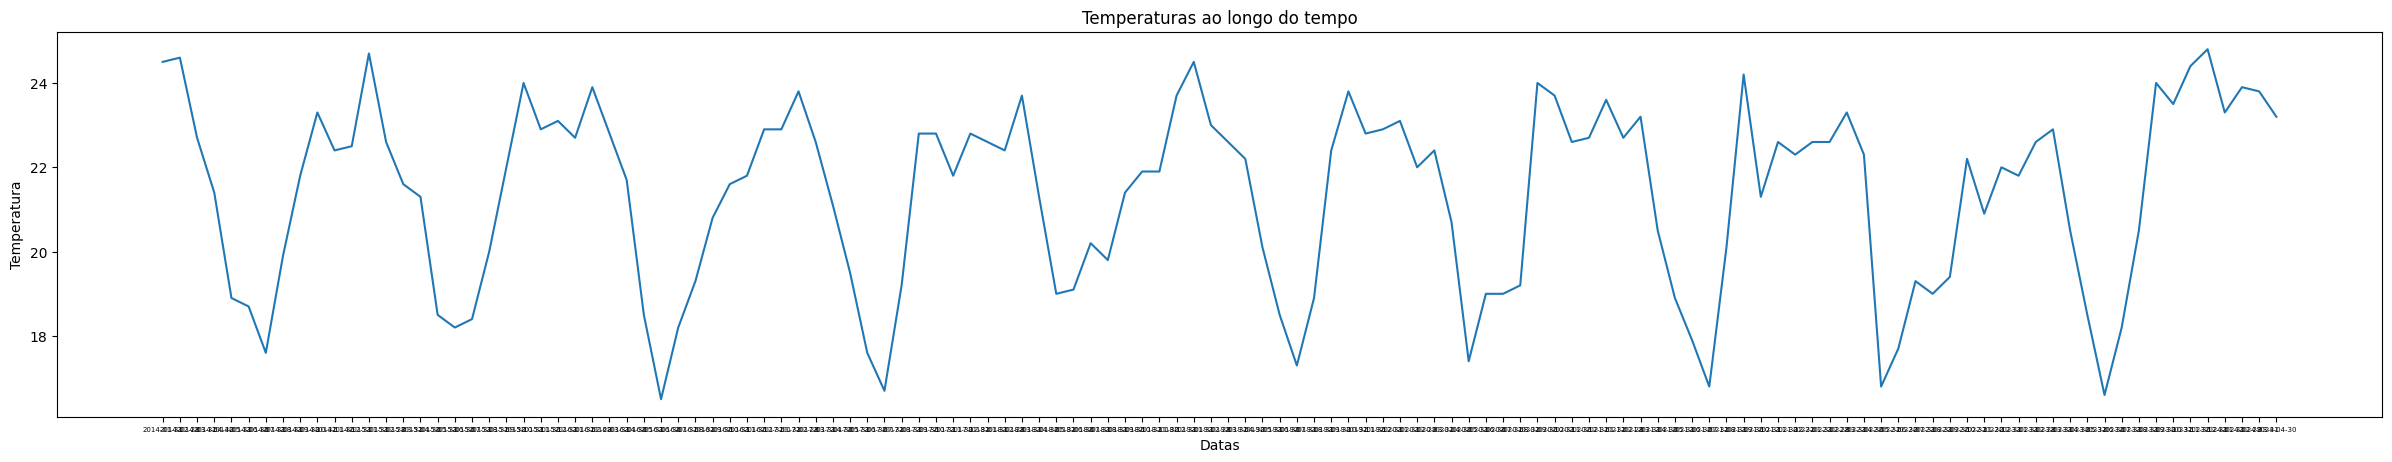

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(30, 5))
plt.plot(df['data'], df['temperatura'])
plt.xticks(fontsize=5)

plt.title("Temperaturas ao longo do tempo")
plt.xlabel("Datas")
plt.ylabel("Temperatura")

plt.show()

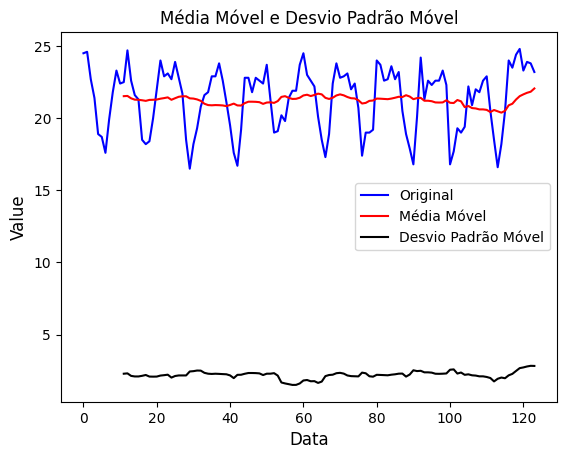

In [ ]:
rolling_mean = df['temperatura'].rolling(window = 12).mean()
rolling_std = df['temperatura'].rolling(window = 12).std()
plt.plot(df['temperatura'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Média Móvel')
plt.plot(rolling_std, color = 'black', label = 'Desvio Padrão Móvel')
plt.xlabel('Data', size = 12)
plt.ylabel('Value', size  = 12)
plt.legend(loc = 'best')
plt.title('Média Móvel e Desvio Padrão Móvel')
plt.show()

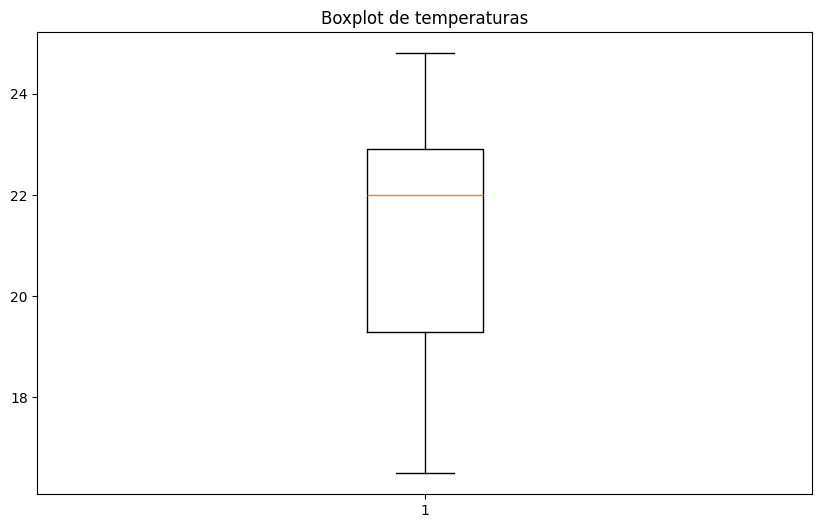

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['temperatura'])
plt.title('Boxplot de temperaturas')
plt.show()


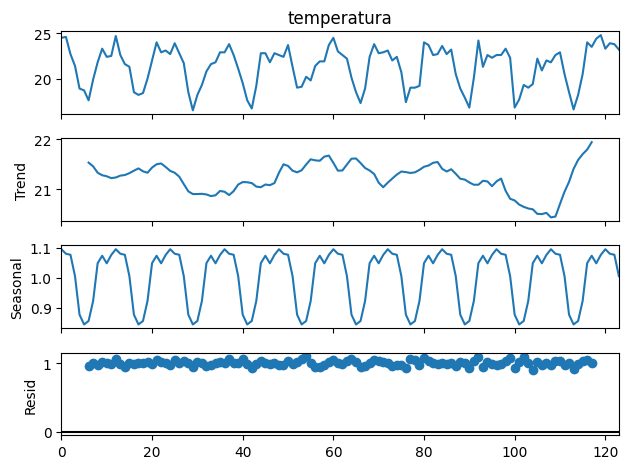

In [ ]:
import statsmodels.api as sm

dec = sm.tsa.seasonal_decompose(df['temperatura'],period = 12, model = 'multiplicative')
dec.plot()
plt.show()

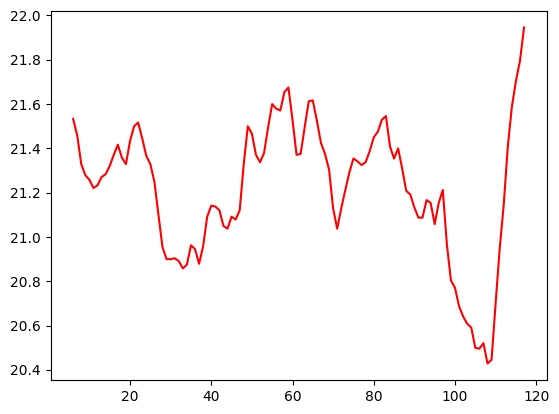

In [ ]:
plt.plot(dec.trend, label='Trend', color='red')

### Previsão e Modelagem

### AUTO ARIMA

In [ ]:
df.head()

,data,temperatura
0,2014-01-31,24.5
1,2014-02-28,24.6
2,2014-03-31,22.7
3,2014-04-30,21.4
4,2014-05-31,18.9


In [ ]:
df.shape

(124, 2)

In [ ]:
df.head()

,data,temperatura
0,2014-01-31,24.5
1,2014-02-28,24.6
2,2014-03-31,22.7
3,2014-04-30,21.4
4,2014-05-31,18.9


In [ ]:
!pip install pmdarima

Interpretação do model_auto_arima.summary() segundo o GPT :

Informações Gerais:

Modelo: Indica o tipo de modelo ARIMA ajustado (por exemplo, ARIMA(p,d,q) ou SARIMA(p,d,q)(P,D,Q)m).
Método de Ajuste: Mostra se o ajuste foi feito usando um método stepwise (etapa a etapa) ou não.
Método de Seleção de Parâmetros: Indica o método usado para selecionar automaticamente os parâmetros do modelo (por exemplo, AIC, AICc, BIC).
Estatísticas de Ajuste:

Estatísticas AIC/AICc/BIC: São critérios de informação para avaliar o ajuste do modelo. Quanto menor, melhor.
Durbin-Watson: É um teste de autocorrelação nos resíduos. Valores próximos a 2 indicam ausência de autocorrelação.
Coeficientes do Modelo (AR, I, MA):

AR (Autoregressive): Coeficientes para os termos autoregressivos do modelo ARIMA.
I (Integrated): Ordem de diferenciação utilizada para tornar a série estacionária.
MA (Moving Average): Coeficientes para os termos de médias móveis do modelo ARIMA.

In [ ]:
from pmdarima import auto_arima

model_auto_arima = auto_arima(df['temperatura'],
                              seasonal=False,
                              stepwise=True,
                              suppress_warnings=True)

# Exibir os melhores parâmetros encontrados
print(model_auto_arima.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  124
Model:               SARIMAX(4, 0, 1)   Log Likelihood                -206.775
Date:                Thu, 30 Jan 2025   AIC                            427.549
Time:                        12:02:21   BIC                            447.291
Sample:                             0   HQIC                           435.569
                                - 124                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.7164      2.101      4.148      0.000       4.598      12.835
ar.L1          1.4107      0.176      8.028      0.000       1.066       1.755
ar.L2         -0.8194      0.226     -3.633      0.0

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
df.head()

,data,temperatura
0,2014-01-31,24.5
1,2014-02-28,24.6
2,2014-03-31,22.7
3,2014-04-30,21.4
4,2014-05-31,18.9


In [ ]:
df['data'] = pd.to_datetime(df['data'])
df.set_index('data', inplace=True)

In [ ]:

forecast_auto_arima = model_auto_arima.predict(n_periods=10)

last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=11, freq='M')

future_dates = future_dates[1:]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
<ipython-input-66-6a8249f1d7d1>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=11, freq='M')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2014-01-31 to 2024-04-30
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperatura  124 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [ ]:
future_dates

DatetimeIndex(['2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31', '2025-02-28'],
              dtype='datetime64[ns]', freq='ME')

In [ ]:
print(forecast_auto_arima)

124    20.543513
125    18.641081
126    18.000019
127    18.103388
128    18.978856
129    20.469002
130    22.053952
131    23.275813
132    23.864952
133    23.719105
dtype: float64


In [ ]:
df.tail()

,temperatura
data,
2023-12-31,24.8
2024-01-31,23.3
2024-02-29,23.9
2024-03-31,23.8
2024-04-30,23.2


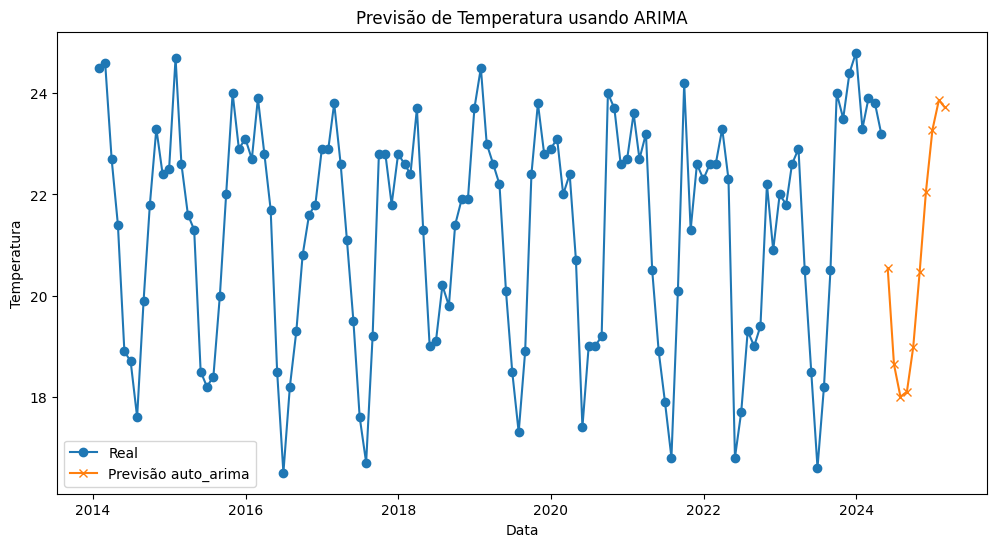

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['temperatura'], label='Real', marker='o')
plt.plot(future_dates, forecast_auto_arima, label='Previsão auto_arima', marker='x')
plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.title('Previsão de Temperatura usando ARIMA')
plt.legend()
plt.show()


In [ ]:
from pmdarima.model_selection import train_test_split

train, test = train_test_split(df['temperatura'], test_size=0.2)

In [ ]:
train.shape , test.shape

((99,), (25,))

In [ ]:
from pmdarima import auto_arima

# Ajustar o modelo auto_arima no conjunto de treinamento
model_auto_arima = auto_arima(train,
                              seasonal=False,
                              stepwise=True,
                              suppress_warnings=True)

# Exibir os melhores parâmetros encontrados
print(model_auto_arima.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   99
Model:               SARIMAX(5, 0, 2)   Log Likelihood                -156.067
Date:                Thu, 30 Jan 2025   AIC                            330.135
Time:                        12:03:04   BIC                            353.491
Sample:                    01-31-2014   HQIC                           339.585
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.3743      9.928      2.052      0.040       0.916      39.833
ar.L1          0.4779      0.898      0.532      0.594      -1.281       2.237
ar.L2          0.2737      1.161      0.236      0.8

**Teórico**

Erro Quadrático Médio (MSE - Mean Squared Error):

    O MSE é uma medida que calcula a média dos quadrados dos erros entre os valores reais e os valores previstos.

    Quanto menor o valor do MSE, melhor é o desempenho do modelo, pois indica que os valores previstos estão mais próximos dos valores reais.


Erro Absoluto Médio (MAE - Mean Absolute Error):

    O MAE é uma medida que calcula a média dos valores absolutos dos erros entre os valores reais e os valores previstos.

    O MAE é menos sensível a outliers em comparação com o MSE, pois não eleva os erros ao quadrado.

    Quanto menor o valor do MAE, melhor é o desempenho do modelo, pois indica que os valores previstos estão mais próximos dos valores reais.



Erro Percentual Absoluto Médio (MAPE - Mean Absolute Percentage Error):

    O MAPE é uma medida que calcula a média dos valores absolutos das diferenças percentuais entre os valores reais e os valores previstos.

    O MAPE é uma métrica relativa, o que significa que o resultado é apresentado como uma porcentagem do valor real.

    Quanto menor o valor do MAPE, melhor é o desempenho do modelo.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

forecast_auto_arima = model_auto_arima.predict(n_periods=len(test))
mse = mean_squared_error(test, forecast_auto_arima)
mae = mean_absolute_error(test, forecast_auto_arima)

mape = 100 * (sum(abs(test - forecast_auto_arima) / test) / len(test))
print("ARIMA")
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')

ARIMA
MSE: 3.24
MAE: 1.54
MAPE: 7.39%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### PROPHET

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
df.head()

,temperatura
data,
2014-01-31,24.5
2014-02-28,24.6
2014-03-31,22.7
2014-04-30,21.4
2014-05-31,18.9


In [ ]:
df.rename(columns={'date': 'ds', 'temperature': 'y'}, inplace=True)


In [ ]:
df.head()

,temperatura
data,
2014-01-31,24.5
2014-02-28,24.6
2014-03-31,22.7
2014-04-30,21.4
2014-05-31,18.9


In [ ]:
df.reset_index(inplace=True)
df.rename(columns={"data":"ds","temperatura":"y"},inplace=True)

In [ ]:
df.drop(columns=['index'],inplace=True)

In [ ]:
df.head()

,ds,y
0,2014-01-31,24.5
1,2014-02-28,24.6
2,2014-03-31,22.7
3,2014-04-30,21.4
4,2014-05-31,18.9


In [ ]:
model_prophet = Prophet()

model_prophet.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptz5d6ear/vclvff1y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptz5d6ear/t3vbat8u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8567', 'data', 'file=/tmp/tmptz5d6ear/vclvff1y.json', 'init=/tmp/tmptz5d6ear/t3vbat8u.json', 'output', 'file=/tmp/tmptz5d6ear/prophet_modelg2ml91ru/prophet_model-20250130120503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:05:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = model_prophet.make_future_dataframe(periods=10, freq='M')

forecast = model_prophet.predict(future_dates)

# Exibir as previsões
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

            ds       yhat  yhat_lower  yhat_upper
129 2024-10-31  22.950469   21.764956   24.111959
130 2024-11-30  22.603443   21.513530   23.709624
131 2024-12-31  23.138681   22.018902   24.187271
132 2025-01-31  23.771343   22.666762   24.870707
133 2025-02-28  23.572589   22.427919   24.677792


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


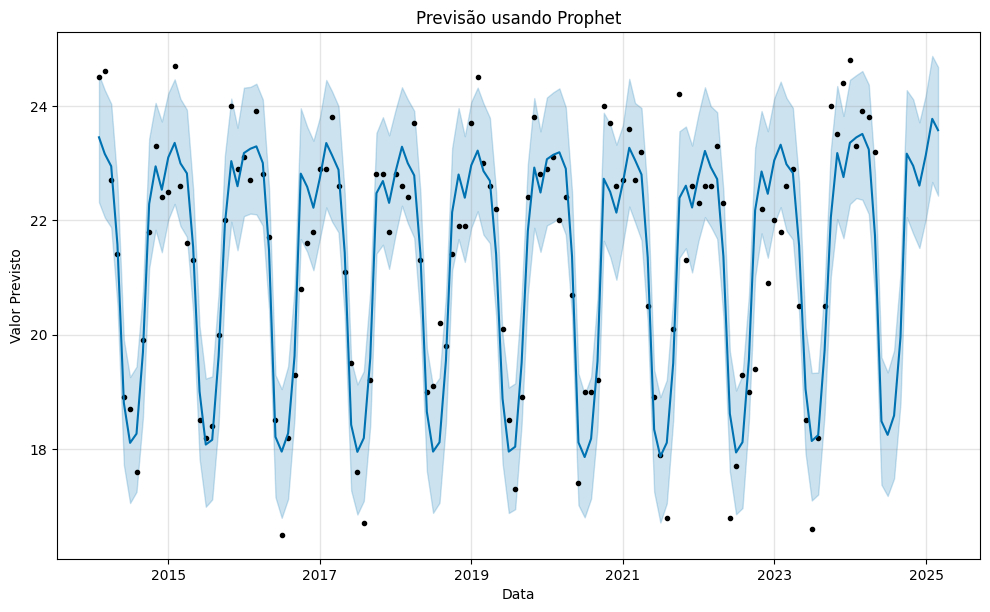

In [ ]:
model_prophet.plot(forecast)
plt.xlabel('Data')
plt.ylabel('Valor Previsto')
plt.title('Previsão usando Prophet')
plt.show()

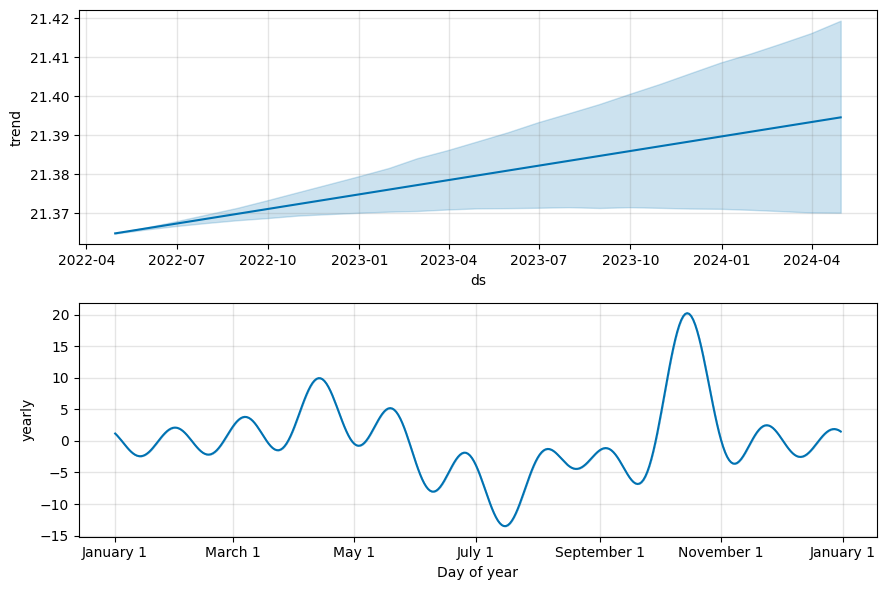

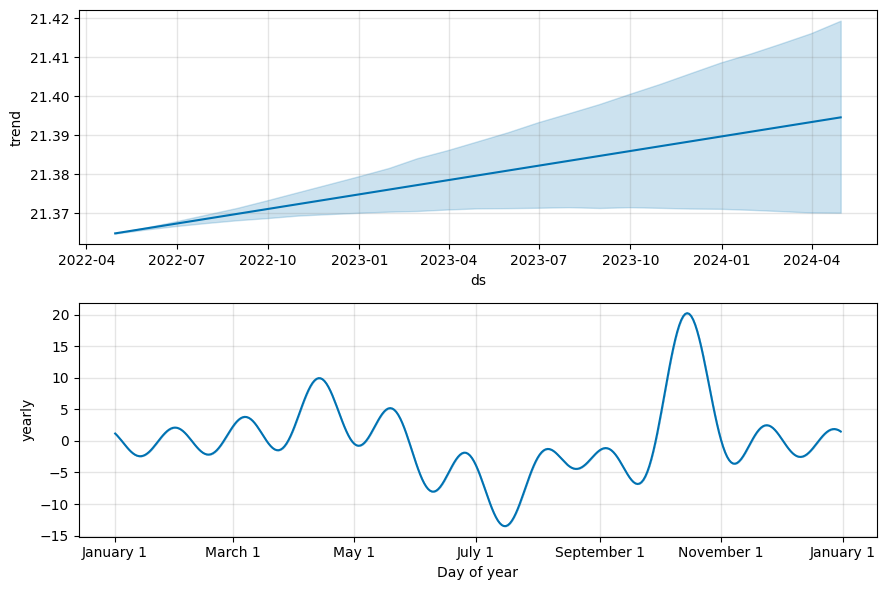

In [ ]:
model_prophet.plot_components(forecast)


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir o DataFrame em conjunto de treinamento e conjunto de teste (80% treino, 20% teste)
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

model_prophet = Prophet()
model_prophet.fit(train_df)

forecast = model_prophet.predict(test_df)

test_values = test_df['y']

forecast_values = forecast['yhat']





INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptz5d6ear/jje7cm3_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptz5d6ear/bflv0_g7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25909', 'data', 'file=/tmp/tmptz5d6ear/jje7cm3_.json', 'init=/tmp/tmptz5d6ear/bflv0_g7.json', 'output', 'file=/tmp/tmptz5d6ear/prophet_modell7l9xepr/prophet_model-20250130120604.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:06:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:06:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
import numpy as np

In [ ]:
forecast_values.values

array([21.3317436 , 18.98385822, 18.27815531, 17.96709216, 19.53980087,
       22.25301398, 22.98325349, 22.43576415, 22.92533287, 23.47826044,
       22.90507981, 22.51901051, 21.45564479, 19.24253468, 18.42720137,
       17.81445587, 19.4807571 , 21.88508475, 23.32366385, 22.55582899,
       22.99103909, 23.48069085, 23.28837244, 23.09531345, 21.16492886])

In [ ]:
test_df.head()

,ds,y
99,2022-04-30,22.3
100,2022-05-31,16.8
101,2022-06-30,17.7
102,2022-07-31,19.3
103,2022-08-31,19.0


In [ ]:
mape_prophet = 100 * (np.abs(test_df['y'] - forecast_values.values) / test_df['y']).mean()
mse_prophet = mean_squared_error(test_values, forecast_values)
mae_prophet = mean_absolute_error(test_values, forecast_values)


print(f'MSE do Prophet: {mse_prophet:.2f}')
print(f'MAE do Prophet: {mae_prophet:.2f}')
print(f'MAPE do Prophet: {mape_prophet:.2f}%')


MSE do Prophet: 1.81
MAE do Prophet: 1.14
MAPE do Prophet: 5.48%
